# RNN

In [45]:
#Importing everything needed
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [46]:
#Created a class which a produces a sine wave as data
class TimeSeriesData():
    
    def __init__(self, num_points, xmin, xmax):
        self.xmin = xmin
        self.xmax = xmax
        self.num_points = num_points
        self.resolution = (xmax-xmin)/num_points
        self.x_data = np.linspace(xmin, xmax, num_points)
        self.y_true = np.sin(self.x_data)
    
    #Y true values
    def ret_true(self, x_series):
        return np.sin(x_series)
    
    #Get next batch
    def next_batch(self, batch_size, steps, return_batch_ts=False):
        
        rand_start = np.random.rand(batch_size,1)
        
        ts_start = rand_start * (self.xmax - self.xmin - (steps * self.resolution))
        
        batch_ts = ts_start + np.arange(0.0, steps+1) * self.resolution
        
        y_batch = np.sin(batch_ts)
        
        if return_batch_ts:
            return y_batch[:,:-1].reshape(-1, steps, 1), y_batch[:,1:].reshape(-1, steps, 1), batch_ts
        else:
            return y_batch[:,:-1].reshape(-1, steps, 1), y_batch[:,1:].reshape(-1, steps, 1)

In [47]:
#Create a data with 250 point from 0 to 10
ts_data = TimeSeriesData(250, 0, 10)

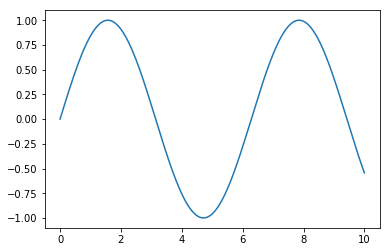

In [48]:
#Plot the data
plt.plot(ts_data.x_data, ts_data.y_true)

In [49]:
#Number of steps
num_time_steps = 30

In [50]:
#Get the nest batch, ts being x and ys being the wave
y1, y2, ts = ts_data.next_batch(1, num_time_steps, True)

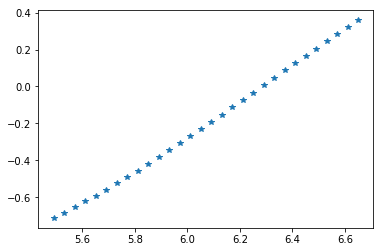

In [51]:
#Plot the batch
plt.plot(ts.flatten()[1:], y2.flatten(), '*')

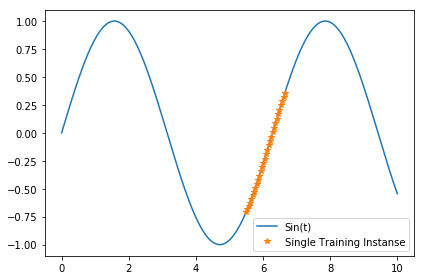

In [52]:
#Visualize the data
plt.plot(ts_data.x_data, ts_data.y_true, label='Sin(t)')
plt.plot(ts.flatten()[1:], y2.flatten(), '*', label='Single Training Instanse')
plt.legend()
plt.tight_layout()

In [53]:
train_inst = np.linspace(5, 5 + ts_data.resolution*(num_time_steps+1), num_time_steps+1)

In [54]:
train_inst

array([5.        , 5.04133333, 5.08266667, 5.124     , 5.16533333,
       5.20666667, 5.248     , 5.28933333, 5.33066667, 5.372     ,
       5.41333333, 5.45466667, 5.496     , 5.53733333, 5.57866667,
       5.62      , 5.66133333, 5.70266667, 5.744     , 5.78533333,
       5.82666667, 5.868     , 5.90933333, 5.95066667, 5.992     ,
       6.03333333, 6.07466667, 6.116     , 6.15733333, 6.19866667,
       6.24      ])

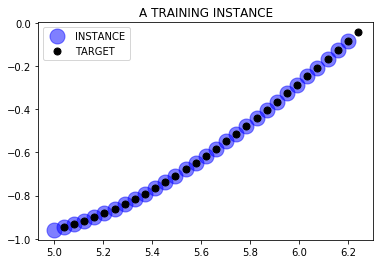

In [55]:
plt.title('A TRAINING INSTANCE')

plt.plot(train_inst[:-1], ts_data.ret_true(train_inst[:-1]), 'bo', markersize=15, alpha=0.5, label='INSTANCE')

plt.plot(train_inst[1:], ts_data.ret_true(train_inst[1:]), 'ko', markersize=7, label='TARGET')

plt.legend()

# Creating the Model

In [56]:
tf.reset_default_graph()

In [57]:
num_inputs = 1
num_neurons = 100
num_outputs = 1
learning_rate = 0.0001
num_train_iterations = 2000
batch_size = 1

In [58]:
x = tf.placeholder(tf.float32, [None, num_time_steps, num_inputs])
y = tf.placeholder(tf.float32, [None, num_time_steps, num_outputs])

In [59]:
cell = tf.contrib.rnn.OutputProjectionWrapper(tf.contrib.rnn.BasicRNNCell(num_units=num_neurons, activation=tf.nn.relu), 
                                              output_size=num_outputs)

In [60]:
outputs, states = tf.nn.dynamic_rnn(cell, x, dtype=tf.float32)

In [61]:
loss = tf.reduce_mean(tf.square(outputs-1))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train = optimizer.minimize(loss)

In [62]:
init = tf.global_variables_initializer()

In [63]:
saver = tf.train.Saver()

In [64]:
with tf.Session() as sess:
    
    sess.run(init)
    
    for iteration in range(num_train_iterations):
        
        x_batch, y_batch = ts_data.next_batch(batch_size, num_time_steps)
        
        sess.run(train, feed_dict = {x:x_batch, y: y_batch})
        
        if iteration % 100 == 0:
            
            mse = loss.eval(feed_dict={x:x_batch, y:y_batch})
            print(iteration, "\t MSE", mse)
        
        saver.save(sess, './sine_model')

0 	 MSE 0.9738329
100 	 MSE 0.19274274
200 	 MSE 0.10758566
300 	 MSE 0.13308717
400 	 MSE 0.040315177
500 	 MSE 0.02938358
600 	 MSE 0.023542905
700 	 MSE 0.018842261
800 	 MSE 0.017215608
900 	 MSE 0.025964784
1000 	 MSE 0.028278219
1100 	 MSE 0.021414617
1200 	 MSE 0.01040475
1300 	 MSE 0.023409825
1400 	 MSE 0.009728441
1500 	 MSE 0.007942333
1600 	 MSE 0.015615196
1700 	 MSE 0.017327206
1800 	 MSE 0.010027914
1900 	 MSE 0.00525698
